In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style('whitegrid')

#colours for capacity localities
col_NYCA = '#818285' #RGB(129,130,133)
col_GJ = '#9FD26C' #RGB(159,210,108)
col_NYC = '#135D86' #RGB(19,93,134)
col_LI = '#C10000' #RGB(193,0,0)

In [38]:
capa1 = pd.read_csv('../data/Monthly_Generating_Capacity_EIA_allSources.csv')
capa2 = pd.read_csv('../data/Annual_Generating_Capacity_EIA_allSources.csv')
capa = pd.concat([capa2,capa1])
capa_planned = pd.read_csv('../data/Monthly_Generating_Capacity_EIA_Planned_allSources.csv')
ucap = pd.read_csv('../data/Monthly_UCAP_Requirements.csv')
icap = pd.read_csv('cap.csv')
icap_caps = pd.read_csv('../data/ICAP_Price_Caps.csv', sep=';')
dam = pd.read_csv('dam.csv')

capa['Date'] = pd.to_datetime(capa['Date'])
capa_planned['Date'] = pd.to_datetime(capa_planned['Date'])
ucap['Date'] = pd.to_datetime(ucap['Date'])
icap['Date'] = pd.to_datetime(icap['Date'], format = '%b-%y')
icap_caps['Date'] = pd.to_datetime(icap_caps['Date'], dayfirst=True)
dam['Date'] = pd.to_datetime(dam['Date'])
dam = dam.set_index('Date').shift(periods=-1,freq='M').shift(periods=1,freq='D').reset_index()

In [14]:
#capa1 = capa1.set_index('Date')
capa1['Sum'] = 0
capa1['Sum'] = capa1.sum(axis=1)
capa1

C:\Users\hantk\AppData\Local\Temp\ipykernel_5616\2084226179.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  capa1['Sum'] = capa1.sum(axis=1)


,Date,Capacity Gas (MW),Capacity Coal (MW),Capacity Oil (MW),Capacity Renewables (MW),Capacity Others (MW),Sum
0,2017-01-01,24444.9,1206.5,3832.8,8376.9,5728.1,43589.2
1,2017-02-01,24265.9,1318.5,3700.0,8387.3,5728.1,43399.8
2,2017-03-01,24379.7,1110.5,3700.0,8387.3,5728.1,43305.6
3,2017-04-01,24387.4,1110.5,3710.7,8393.1,5728.1,43329.8
4,2017-05-01,24409.0,1110.5,3689.1,8395.1,5728.1,43331.8
...,...,...,...,...,...,...,...
70,2022-11-01,26325.0,0.0,3808.4,9513.4,3535.4,43182.2
71,2022-12-01,26325.0,0.0,3808.4,9543.4,3535.4,43212.2
72,2023-01-01,26330.2,0.0,3809.0,9692.4,3545.4,43377.0
73,2023-02-01,26285.0,0.0,3808.6,9931.4,3545.4,43570.4


<AxesSubplot:>

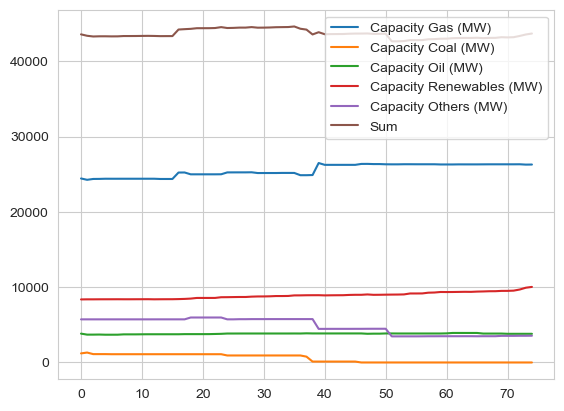

In [15]:
capa1.plot()

In [16]:
#capa2 = capa2.set_index('Date')
capa2['Sum'] = 0
capa2['Sum'] = capa2.sum(axis=1)
capa2.head()

C:\Users\hantk\AppData\Local\Temp\ipykernel_5616\1271554436.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  capa2['Sum'] = capa2.sum(axis=1)


,Date,Capacity Gas (MW),Capacity Coal (MW),Capacity Oil (MW),Capacity Renewables (MW),Capacity Others (MW),Sum
0,2004-01-01,17021.3,4246.3,8225.1,6375.9,5611.2,41479.8
1,2005-01-01,19196.7,4278.8,8209.2,6515.3,5611.2,43811.2
2,2006-01-01,19512.2,4314.0,8240.2,6711.5,5611.2,44389.1
3,2007-01-01,19512.2,4314.0,8240.2,6785.7,5708.1,44560.2
4,2008-01-01,19605.2,4258.0,8240.2,7123.5,5708.1,44935.0


In [17]:
capa_planned = capa_planned.set_index('Date')
capa_planned.head()

,Capacity Gas (MW),Capacity Coal (MW),Capacity Oil (MW),Capacity Renewables (MW),Capacity Others (MW)
Date,,,,,
2017-01-01,2033.0,0,2.5,760.4,0.0
2017-02-01,2033.0,0,2.5,840.4,0.0
2017-03-01,2033.0,0,2.5,793.0,0.0
2017-04-01,2925.5,0,2.5,793.0,0.0
2017-05-01,2925.5,0,2.5,774.9,0.0


<AxesSubplot:xlabel='Date'>

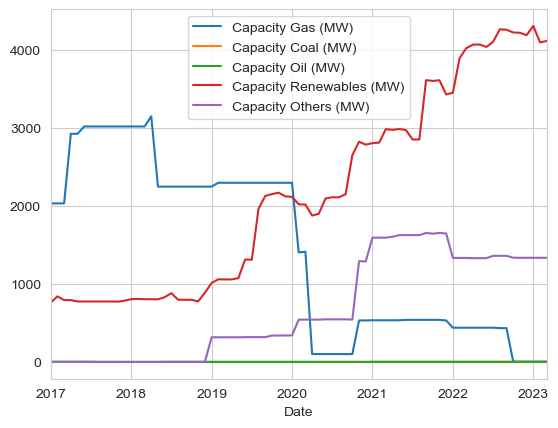

In [18]:
capa_planned.plot()

In [19]:
capa = capa.reset_index()
capa_planned = capa_planned.reset_index()

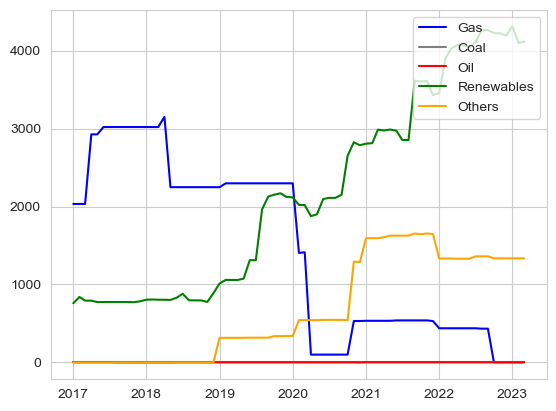

In [20]:
plt.plot(capa_planned['Date'],capa_planned['Capacity Gas (MW)'],'b', label='Gas')
plt.plot(capa_planned['Date'],capa_planned['Capacity Coal (MW)'],'grey', label='Coal')
plt.plot(capa_planned['Date'],capa_planned['Capacity Oil (MW)'],'r', label='Oil')
plt.plot(capa_planned['Date'],capa_planned['Capacity Renewables (MW)'],'g', label='Renewables')
plt.plot(capa_planned['Date'],capa_planned['Capacity Others (MW)'],'orange', label='Others')
plt.legend(loc='upper right')

#ax = plt.gca().xaxis
#ax.xaxis.set_major_locator(mdates.YearLocator(base = 1, month = 1, day = 1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.xticks(rotation=45)
plt.show()

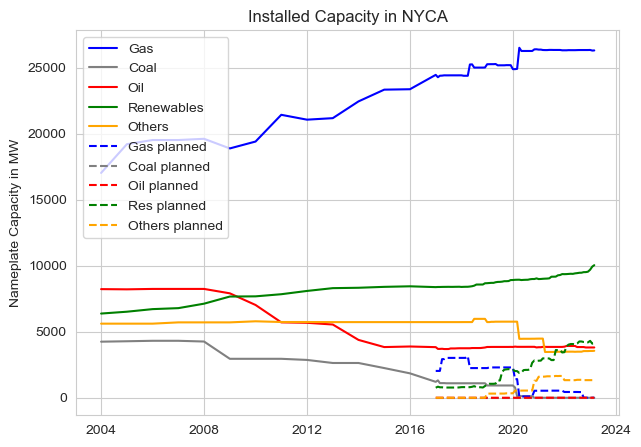

In [21]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(capa['Date'],capa['Capacity Gas (MW)'],'b', label='Gas')
ax.plot(capa['Date'],capa['Capacity Coal (MW)'],'grey', label='Coal')
ax.plot(capa['Date'],capa['Capacity Oil (MW)'],'r', label='Oil')
ax.plot(capa['Date'],capa['Capacity Renewables (MW)'],'g', label='Renewables')
ax.plot(capa['Date'],capa['Capacity Others (MW)'],'orange', label='Others')

ax.plot(capa_planned['Date'],capa_planned['Capacity Gas (MW)'],'b', linestyle='dashed', label='Gas planned')
ax.plot(capa_planned['Date'],capa_planned['Capacity Coal (MW)'],'grey', linestyle='dashed', label='Coal planned')
ax.plot(capa_planned['Date'],capa_planned['Capacity Oil (MW)'],'r', linestyle='dashed', label='Oil planned')
ax.plot(capa_planned['Date'],capa_planned['Capacity Renewables (MW)'],'g', linestyle='dashed', label='Res planned')
ax.plot(capa_planned['Date'],capa_planned['Capacity Others (MW)'],'orange', linestyle='dashed', label='Others planned')

#ax.xaxis.set_major_locator(mdates.YearLocator(base = 1, month = 1, day = 1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_ylabel('Nameplate Capacity in MW')
ax.set_title('Installed Capacity in NYCA')
ax.legend(loc='best')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig('Installed_capacity.png')
plt.show()

C:\Users\hantk\AppData\Local\Temp\ipykernel_5616\2876600049.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  capa['Sum'] = capa.sum(axis=1)


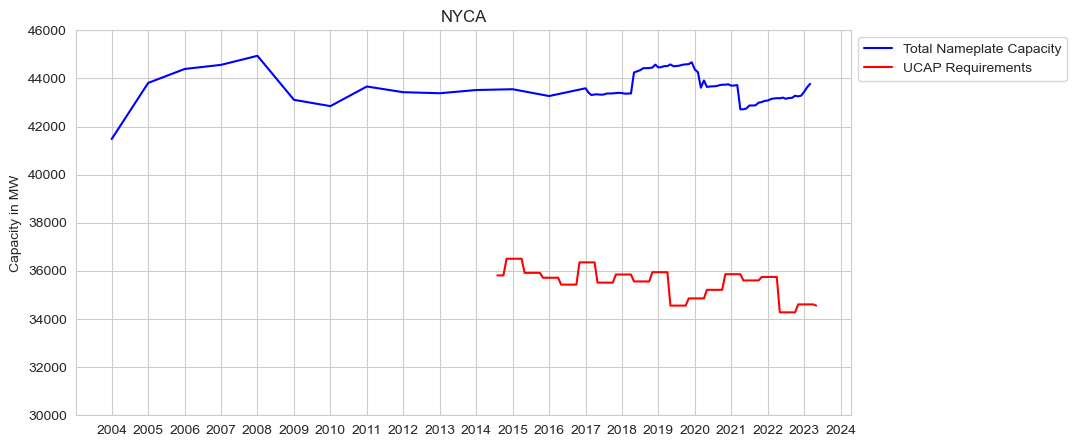

In [22]:
capa['Sum'] = 0
capa['Sum'] = capa.sum(axis=1)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(capa['Date'],capa['Sum'],'b', label='Total Nameplate Capacity')
ax.plot(ucap['Date'],ucap['UCAP NYCA (MW)'],'r', label='UCAP Requirements')

ax.xaxis.set_major_locator(mdates.YearLocator(base = 1, month = 1, day = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_ylabel('Capacity in MW')
ax.set_ylim(30000,46000)

ax.set_title('NYCA')

ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#plt.xticks(rotation=45)
plt.show()

In [23]:
ucap.head()

,Date,UCAP NYCA (MW),UCAP GJ (MW),UCAP NYC (MW),UCAP LI (MW)
0,2014-08-01,35812.4,13494.9,9470.5,5430.5
1,2014-09-01,35812.4,13494.9,9470.5,5430.5
2,2014-10-01,35812.4,13494.9,9470.5,5430.5
3,2014-11-01,36505.6,13582.3,9508.6,5393.5
4,2014-12-01,36505.6,13582.3,9508.6,5393.5


In [24]:
ucap.columns

Index(['Date', 'UCAP NYCA (MW)', 'UCAP GJ (MW)', 'UCAP NYC (MW)',
       'UCAP LI (MW)'],
      dtype='object')

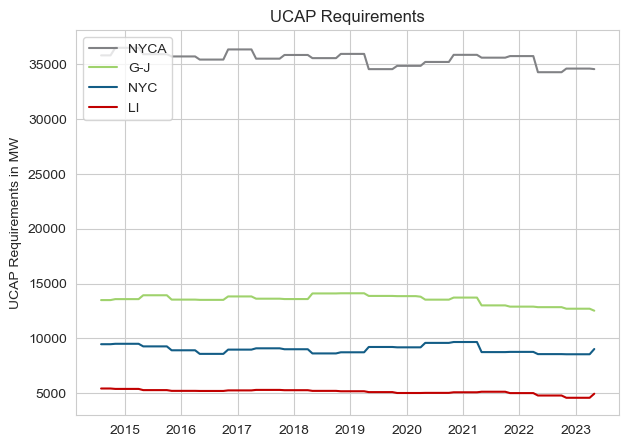

In [25]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(ucap['Date'],ucap['UCAP NYCA (MW)'],col_NYCA, label='NYCA')
ax.plot(ucap['Date'],ucap['UCAP GJ (MW)'],col_GJ, label='G-J')
ax.plot(ucap['Date'],ucap['UCAP NYC (MW)'],col_NYC, label='NYC')
ax.plot(ucap['Date'],ucap['UCAP LI (MW)'],col_LI, label='LI')

#ax.xaxis.set_major_locator(mdates.YearLocator(base = 1, month = 1, day = 1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_ylabel('UCAP Requirements in MW')
ax.set_title('UCAP Requirements')
ax.legend(loc='upper left')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig('UCAP.png')
plt.show()

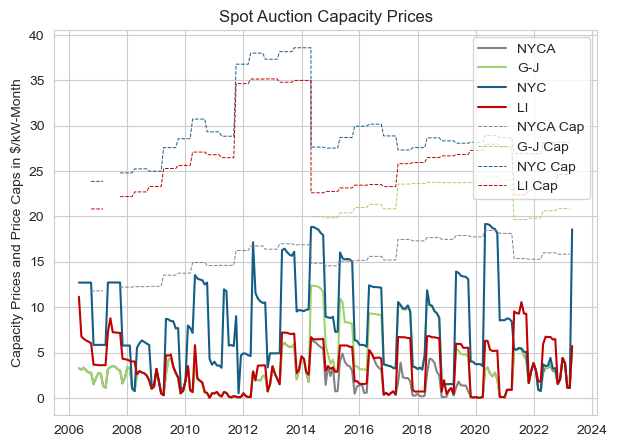

In [40]:
fig, ax = plt.subplots(figsize=(7,5))

# Capacity prices
ax.plot(icap['Date'],icap['NYCA'],col_NYCA, label='NYCA')
ax.plot(icap['Date'],icap['GHIJ'],col_GJ, label='G-J')
ax.plot(icap['Date'],icap['NYC'],col_NYC, label='NYC')
ax.plot(icap['Date'],icap['LI'],col_LI, label='LI')
# Price caps
ax.plot(icap_caps['Date'],icap_caps['NYCA'],col_NYCA, linestyle='--', linewidth=.7, label='NYCA Cap')
ax.plot(icap_caps['Date'],icap_caps['GJ'],col_GJ, linestyle='--', linewidth=.7, label='G-J Cap')
ax.plot(icap_caps['Date'],icap_caps['NYC'],col_NYC, linestyle='--', linewidth=.7, label='NYC Cap')
ax.plot(icap_caps['Date'],icap_caps['LI'],col_LI, linestyle='--', linewidth=.7, label='LI Cap')

#ax.xaxis.set_major_locator(mdates.YearLocator(base = 1, month = 1, day = 1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_ylabel('Capacity Prices and Price Caps in $/kW-Month')
ax.set_title('Spot Auction Capacity Prices')
ax.legend(loc='upper right')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig('Spot_auction_prices.png')
plt.show()

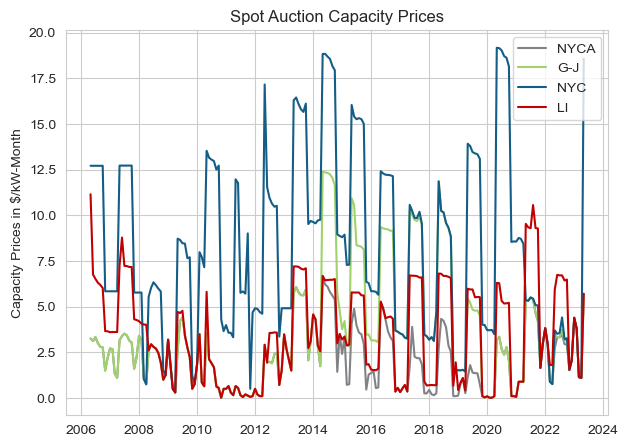

In [42]:
fig, ax = plt.subplots(figsize=(7,5))

# Capacity prices
ax.plot(icap['Date'],icap['NYCA'],col_NYCA, label='NYCA')
ax.plot(icap['Date'],icap['GHIJ'],col_GJ, label='G-J')
ax.plot(icap['Date'],icap['NYC'],col_NYC, label='NYC')
ax.plot(icap['Date'],icap['LI'],col_LI, label='LI')

#ax.xaxis.set_major_locator(mdates.YearLocator(base = 1, month = 1, day = 1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_ylabel('Capacity Prices in $/kW-Month')
ax.set_title('Spot Auction Capacity Prices')
ax.legend(loc='upper right')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig('Spot_auction_prices_wo_caps.png')
plt.show()

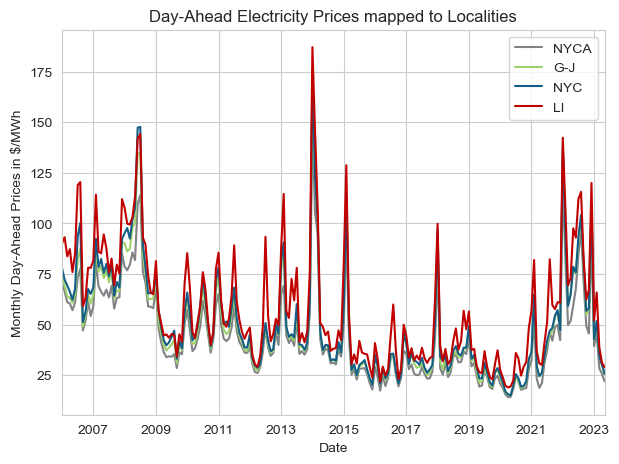

In [81]:
# Day-ahead electricity prices
#dam = dam.set_index('Date')
dam = dam[['NYCA','G-J','NYC','LI']] #change order of columns
ax = dam.plot(figsize=(7,5),color=[col_NYCA,col_GJ,col_NYC,col_LI])

#ax.xaxis.set_major_locator(mdates.YearLocator(base = 1, month = 1, day = 1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_ylabel('Monthly Day-Ahead Prices in $/MWh')
ax.set_title('Day-Ahead Electricity Prices mapped to Localities')
ax.legend(loc='upper right')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig('Electricity_prices_localities.png')
plt.show()

In [83]:
years = range(2006, 2024)

li = []
for year in years:
    df = pd.read_csv(f"../data/dam/OASIS_Day-Ahead_Market_Zonal_LBMP_{year}.csv")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [84]:
frame['Eastern Date Hour Time Zone'].unique()
frame['Date'] = pd.to_datetime(frame['Eastern Date Hour'])

In [85]:
prices_est = frame[frame['Eastern Date Hour Time Zone'] == 'EST']
prices_est = prices_est.pivot(index = 'Date', columns = 'Zone Name', values = 'DAM Zonal LBMP')

prices_edt = frame[frame['Eastern Date Hour Time Zone'] == 'EDT']
prices_edt = prices_edt.pivot(index = 'Date', columns = 'Zone Name', values = 'DAM Zonal LBMP')

In [86]:
prices = pd.concat([prices_est, prices_edt], axis=0)

In [87]:
monthly = prices.resample('M').mean()

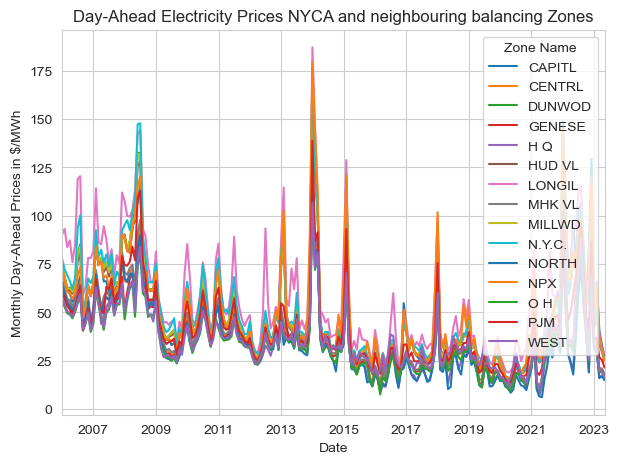

In [94]:
ax = monthly.plot(figsize=(7,5))
ax.set_ylabel('Monthly Day-Ahead Prices in $/MWh')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.legend(loc='upper left')
plt.title("Day-Ahead Electricity Prices NYCA and neighbouring balancing Zones")

plt.savefig('Electricity_prices_zones.png')
plt.show()